# Tareas principales

## Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

### Base de datos de cancer

In [2]:
reviews = pd.read_csv("C:/Users/esmec/Desktop/2/data.csv",index_col=0)

In [3]:
reviews.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
reviews.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
reviews.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

## Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

##### Datos estadisticos para el perimetro del tumor tanto en caso benignos como malignos

In [13]:
reviews['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

## Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

##### En una grafica de barras se puede apreciar mucho mejor los casos que son benignosy malignos, de aqui para sacar la relevancia en cada uno de los dos casos en cantidad de las columas que me interezaran. Pienso que es buena una grafica de barras ya que no son valores continuos.

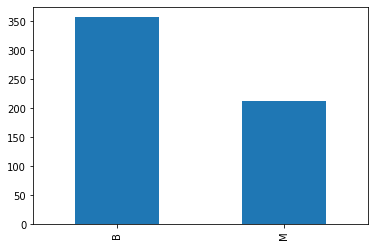

In [12]:
reviews['diagnosis'].value_counts().sort_index().plot.bar()

##### SePuede apreciar como se ve el perimetro de la media del cancer tanto maligno como benigno ya que los valores son continuos se puede sacar provecho a este histograma para despues separa el maligno y benigno y ver como se difrencian o se relacionan

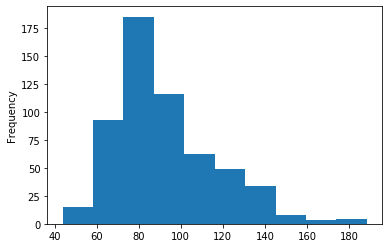

In [31]:
reviews['perimeter_mean'].plot.hist()

#####  Aqui podemos relacionar como el perimetro del tumor en estado maligno y benigno. Vemos que el tumor maligno es mas grande que el benigno.

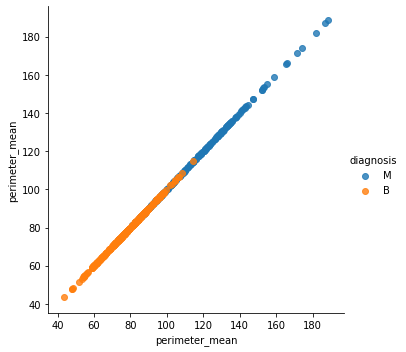

In [19]:
sns.lmplot(x='perimeter_mean', y='perimeter_mean', hue='diagnosis', 
           data=reviews.loc[reviews['diagnosis'].isin(['B', 'M'])], 
           fit_reg=False)

##### Por alguna extraña razon la media de gravedad de las porciones cóncavas del contorno benigno y maligno, el maligno tiene un radio mayor que el benigno . 

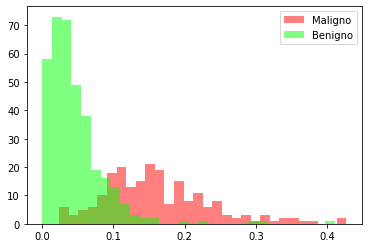

In [26]:
m = plt.hist(reviews[reviews["diagnosis"] == "M"].concavity_mean,bins=30,fc = (1,0,0,0.5),label = "Maligno")
b = plt.hist(reviews[reviews["diagnosis"] == "B"].concavity_mean,bins=30,fc = (0,1,0,0.5),label = "Benigno")
plt.legend()
plt.show()